# Introduction

The dataset that is provided for your final project is the app information scraped from the Google Play Store.

To answer each question, you have to fully explain the meaning of your analysis and interpret the generated plot and what you observe even when it is not explicitly stated in the question. The more reasonable your analysis is, the more positive effect.
it has on acquired grade of the corresponding question. Note that there is no one way to correctly solve each question.
Furthermore, whenever you need to do hypothesis testing you must check all of the pre-requisite conditions (such as sample size, skewness etc.). Finally validity of your
results should be discussed.

# Import libraries

In [486]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import t
from statsmodels.stats.power import tt_solve_power
np.random.seed(42)

# Question 0

Briefly describe your dataset and why studying your dataset can be interesting.
Describe each variable existing in the dataset and specify its type. By doing this
simple task, you gain an initial understanding of your dataset. Knowing your dataset
is the first step in data science and it usually works as a helpful step toward more
advanced analyses.
Using this elementary view of your dataset, which variables do you think may be the
most relevant (contain some important information)? Why? Note that in this section,
we only want you to express your intuition about the relationship between the
variables without doing any quantitative analysis.
Does your dataset have missing values? Provide a summary on portion of missing
values for each variable (feature) and describe how you handle these missing values
for each variable (on what basis).

In [487]:
df = pd.read_csv('/content/Google Play Store.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Number of null values: 0


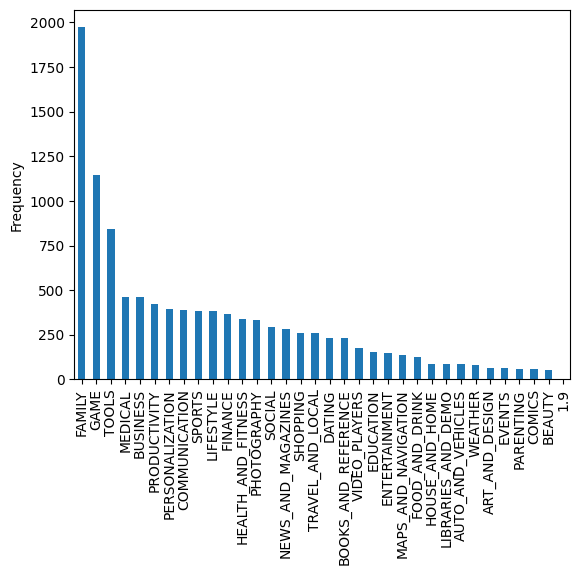

In [488]:
################################################################################
#                          description of variables                            #
################################################################################

################################################################################
# Variable: Category                                                           #
# type: categorical                                                            #
# information: category of each app                                            #
# relation to other variables: Genres                                          #
# application: to find most frequent type of app in google play                #
# importance: high - find out characteristics between different categories     #
################################################################################

print("Number of null values: {}".format(df['Category'].isnull().sum()))
df['Category'].value_counts().plot(kind='bar');
plt.ylabel('Frequency');

Number of null values: 1474


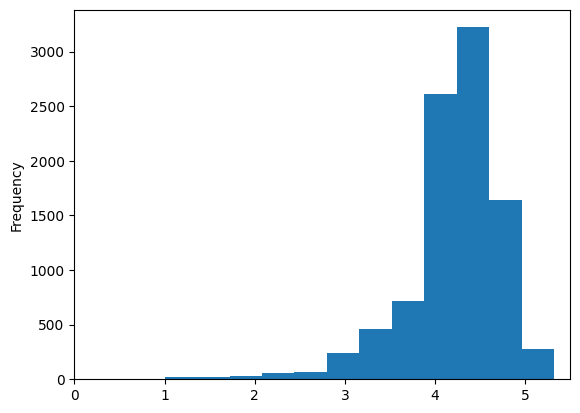

In [489]:
################################################################################
# Variable: Rating                                                             #
# type: Numeric - float - continuous                                           #
# information: how much people like an app on average                          #
# relation to other variables: reviews                                         #
# application: to find the most popular app in each category, to find out      #
#             distribution of ratings                                          #
# importance: high - it shows user satisfiction and app qualities              #
################################################################################

print("Number of null values: {}".format(df['Rating'].isnull().sum()))
plt.hist(df['Rating'], bins=50);
plt.xlim(0, 5.5)
plt.ylabel('Frequency');

In [490]:
################################################################################
# as we can see from the below results, mean values of rating for each category#
# of apps are too similar to each other. it can be a way to replace nulls by   #
# mean of their corresponding categoty, but in my opinion, it does not         #
# make sense to fill these rating values with mean of these ratings!           #
# Because we do not know anything about the app and the reviews. May 1000      #
# individuals rated an app by 1 star, and now we are replacing it with 4.17!   #
# So, in this situation, i prefer to remove null values.                       #
################################################################################

df = df[df['Category'] != '1.9']
df.groupby('Category')['Rating'].mean()

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.109292

In [491]:
################################################################################
# As you can see in below test, by droping null values of rating variable      #
# we just lose around 15 precent of the data based on all categories.          #
# so, we may conclude that is not a big deal! we still have enough             #
# information to do our analysis ... .                                         #
################################################################################

category_before_null = df['Category'].value_counts().tolist()
df.dropna(subset='Rating', inplace=True)
category_after_null = df['Category'].value_counts().tolist()
diffs = []

for cat1, cat2 in zip(category_before_null, category_after_null):
    diffs.append((np.abs(cat1 - cat2) / ((cat1 + cat2) / 2)) * 100)

print(f"Precentage of data loss by droping null valus of Rating: {np.mean(diffs)}%")

Precentage of data loss by droping null valus of Rating: 15.453178959651561%


<ipython-input-491-9924ead177f4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset='Rating', inplace=True)


In [492]:
################################################################################
# Variable: Reviews                                                            #
# type: numerical - int - descrete                                             #
# information: the number of people who rated an app                           #
# relation to other variables: Rating                                          #
# application: to find the popoulation of the raters.                          #
# importance: high - it shows popularity of the app and its engagment level    #
################################################################################

print("Number of null values: {}".format(df['Reviews'].isnull().sum()))

Number of null values: 0


In [493]:
################################################################################
# Variable: Size                                                               #
# type: categorical - string - we can convert it to be numerical               #
# application: to find the avenrage size of apps                               #
################################################################################

print("Number of null values: {}".format(df['Size'].isnull().sum()))

Number of null values: 0


In [494]:
# In this code cell, I convert Size vatiable to be a numerical and
# fill the values of "varies by device" with mean of belonging category

def convert_size(size):
    if size[-1] == 'M':
        return float(size[:-1])
    elif size[-1] == 'k':
        return float(size[:-1]) / 1024
    else:
        return -100

df['Size'] = df['Size'].apply(convert_size)

group_wise_mean = df[df['Size'] != -100].groupby('Category')['Size'].mean()
for index, size in enumerate(df['Size']):
    if size == -100:
        cat = df['Category'].iloc[index]
        group_mean = group_wise_mean[cat]
        df.iloc[index, df.columns.get_loc('Size')] = group_mean

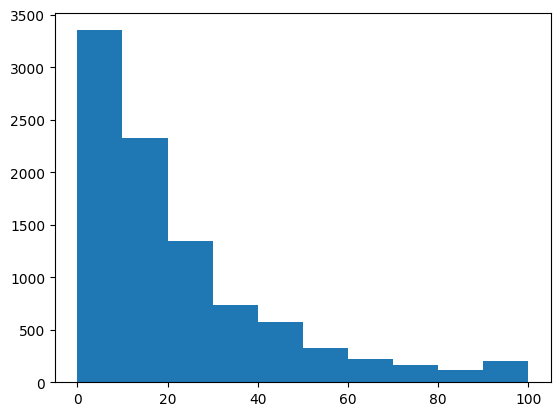

In [495]:
plt.hist(df['Size']);

Number of null values: 0


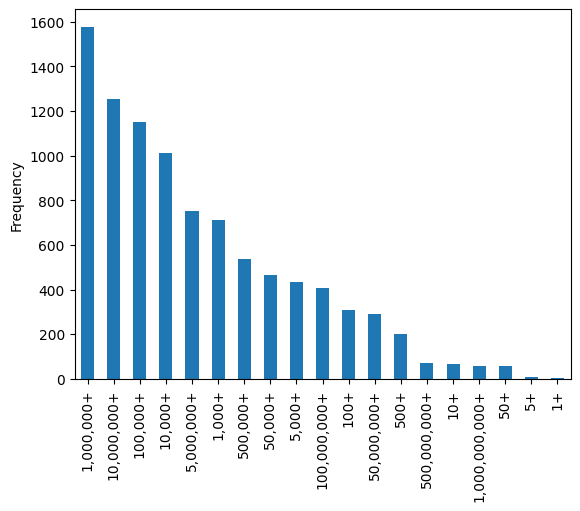

In [496]:
################################################################################
# Variable: Installs                                                           #
# type: categorical - string                                                   #
# information: How many times this app is installed                            #
# application: to find the number of installers.                               #
################################################################################

print("Number of null values: {}".format(df['Installs'].isnull().sum()))
df['Installs'].value_counts().plot(kind='bar');
plt.ylabel('Frequency');

In [497]:
################################################################################
# Variable: Type                                                               #
# type: categorical - string                                                   #
# information: type of app in terms of the price                               #
# application: to find the porportion of free or paid apps                     #
################################################################################

print("Number of null values: {}".format(df['Type'].isnull().sum()))

################################################################################
# In this variable, we have some rows with the value of 0. I assume that       #
# this is because of bad scraping or something like that. So, we can           #
# delete those rows to have a clean dataset.                                   #
################################################################################

print('Unique values of Type variable: ', df['Type'].unique())
df = df[df['Type'] != '0']  # remove 0 values
print('Unique values of Type variable: ', df['Type'].unique())

Number of null values: 0
Unique values of Type variable:  ['Free' 'Paid']
Unique values of Type variable:  ['Free' 'Paid']


In [498]:
################################################################################
# Variable: Price                                                              #
# type: numerical - float                                                      #
# information: the cost of app that user should pay for it                     #
# relation to other variables: Type                                            #
# application: to find average price of apps                                   #
################################################################################

print("Number of null values: {}".format(df['Price'].isnull().sum()))

Number of null values: 0


Number of null values: 0


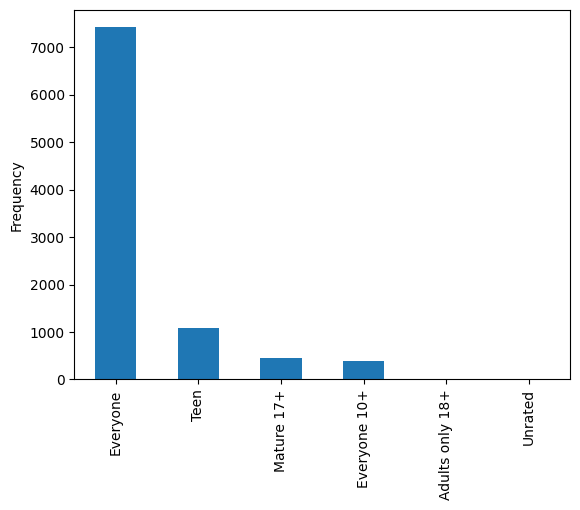

In [499]:
################################################################################
# Variable: Content Rating                                                     #
# type: categorical - string                                                   #
# information: target population of an app based on their maturity             #
################################################################################

print("Number of null values: {}".format(df['Content Rating'].isnull().sum()))
df['Content Rating'].value_counts().plot(kind='bar');
plt.ylabel('Frequency');

In [500]:
################################################################################
# Variable: Genres                                                             #
# type: categorical - string                                                   #
# information: category of the app                                             #
# relation to other variables: category                                        #
################################################################################

print("Number of null values: {}".format(df['Genres'].isnull().sum()))

Number of null values: 0


In [501]:
################################################################################
# Variable: Last Updated                                                       #
# type: date                                                                   #
# information: the last time that app is updated by developer                  #
################################################################################

print("Number of null values: {}".format(df['Last Updated'].isnull().sum()))

Number of null values: 0


In [502]:
################################################################################
# Variable: Current Ver                                                        #
# type: string                                                                 #
# information: last version of the app                                         #
# relation to other variables: Last Updated                                    #
################################################################################

print("Number of null values: {}".format(df['Current Ver'].isnull().sum()))

################################################################################
# in this column, we cannot use methods of null value filling. because we do   #
# not know the current version of the app and it is not logical to just        #
# guess and replace it with a value that we are not sure about it.             #
# so, we can remove null values.                                               #
################################################################################

Number of null values: 4


In [503]:
################################################################################
# Variable: Android Ver                                                        #
# type: categorical, string                                                                 #
# information: the lowest version of android OS that user should have          #
################################################################################

print("Number of null values: {}".format(df['Android Ver'].isnull().sum()))

################################################################################
# in this column, we cannot use methods of null value filling. because we      #
# do not know the needed android version and it is not logical to              #
# just guess and replace it with a value that we are not sure about it.        #
################################################################################

Number of null values: 2


# Question 1

Select one numerical variable from your dataset.
1. Plot a histogram for this numerical variable with an appropriate bin size.
2. Plot the density plot for this numerical variable
3. Describe modality and skewness (calculate skewness).
4. Calculate mean , variance, standard deviation.
5. Draw the boxplot, determine the upper and lower quartiles, whiskers, and the
IQR.
6. Determine the outliers for this variable.

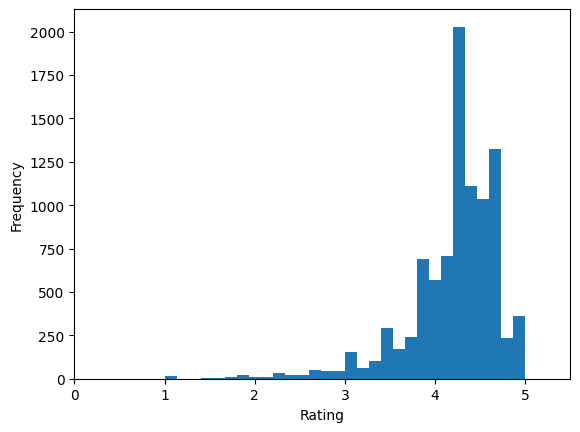

In [504]:
################################################################################
# Question 1:                                                                  #
# in response to this question, I like to choose rating which is               #
# important variable in our dataset and because i want to see a more           #
# detailed view of the histogram i choose bin=30.                              #
################################################################################

plt.hist(df['Rating'], bins=30);
plt.xlim(0, 5.5)
plt.ylabel('Frequency');
plt.xlabel('Rating');

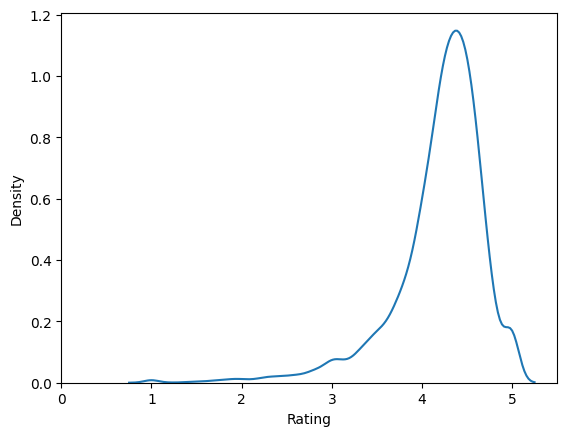

In [505]:
################################################################################
# Question 2:                                                                  #
# i used KDE, because it has some advantages in comparison with histogram      #
# to show the density of the population.                                       #
################################################################################

sns.kdeplot(df['Rating']);
plt.xlim(0, 5.5);

Skewness of Rating: -0.6302714529903873


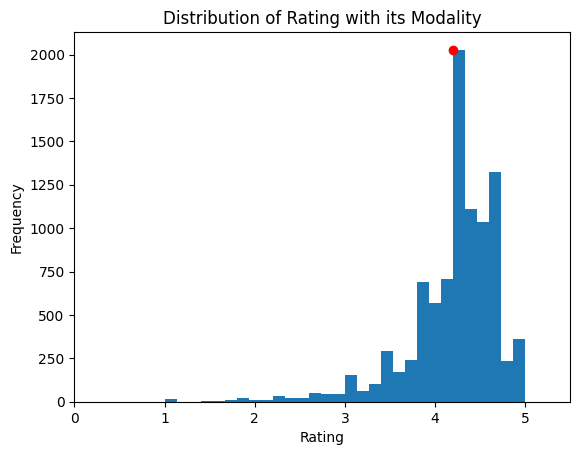

In [506]:
################################################################################
# Question 3:                                                                  #
# Modadily: i just can see one peak in the histogram of this variable          #
# Skewness: this histogram has left skewness!                                  #
################################################################################

print('Skewness of Rating:',
      3 * (df['Rating'].mean() - df['Rating'].median()) / df['Rating'].std()
)

hist, bins, _ = plt.hist(df['Rating'], bins=30)

# find the highest bins
peaks = np.where(hist == hist.max())[0]

plt.plot(bins[peaks], hist[peaks], 'ro')
plt.xlim(0, 5.5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating with its Modality');

In [507]:
# Question 4:

print('Mean of Rating: ', df['Rating'].mean())
print('Variance of Rating: ', df['Rating'].var())
print('Standard deviation of Rating: ', df['Rating'].std())

Mean of Rating:  4.191757420456972
Variance of Rating:  0.2654504722754168
Standard deviation of Rating:  0.5152188586177886


Q1: 4.0
Q3: 4.5
IQR: 0.5
Whiskers: [3.3, 5.0]


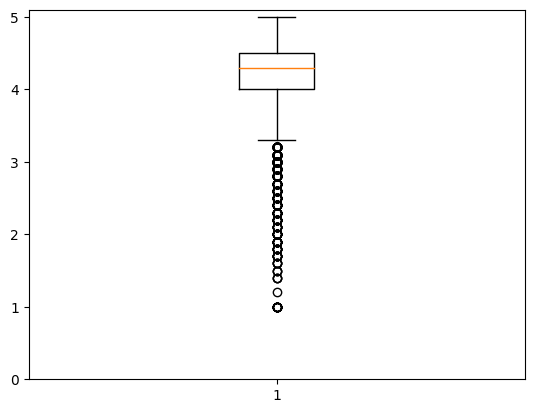

In [508]:
# Question 5:

df.dropna(subset='Rating', inplace=True)

box_plot = plt.boxplot(df['Rating'])
plt.ylim(0,5.1)

q1 = np.percentile(df['Rating'], 25)
q3 = np.percentile(df['Rating'], 75)
IQR = q3 - q1
whiskers = [item.get_ydata()[1] for item in box_plot['whiskers']]

print(f'Q1: {q1}')
print(f'Q3: {q3}')
print(f'IQR: {IQR}')
print(f'Whiskers: {whiskers}')

In [509]:
# Question 6:

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers = []
for rating in df['Rating']:
    if rating < lower_bound or rating > upper_bound:
        outliers.append(rating)

################################################################################
# Although most people may think that these points in box plot are outliers,   #
# i think in this specific case, these points are good leverage points!        #
# ratings are between 1 and 5, so it does not make sense to say that those     #
# ratings that are far from the most dense section of the distribution are     #
# outliers!                                                                    #
################################################################################

# Question 2

Select two numerical variables from your dataset.
1. Draw a scatterplot for these two variables.
2. Describe the two variables relation in words. Can you explain this relation?
3. Select a categorical variable and either by symbol or by colour (or both);
distinguish the samples in the scatterplot. Does the relation still hold for
different categories?
4. Calculate the correlation coefficient between these two variables. Using the
`cor.test` function we can also test the significance of a correlation. According
to this test, what is the probability that the two variables, in the population
from which this sample was taken, are in fact not correlated?
5. What is the best estimate for the population correlation coefficient? With only
5% probability of being wrong, what are the lowest and highest values this
coefficient could in fact have? Does this test prove causation?
6. Draw a 2D density plot and a 2D histogram for the two variables. How do you
interpret the resulting graphs? What are the advantages and disadvantages
of each plot?


In [510]:
################################################################################
# Question 1 and 2:                                                            #
# first of all, convert those string variables that can be numerical!          #
################################################################################

df = df[df['Reviews'] != '3.0M']
df['Reviews'] = df['Reviews'].astype(int)

Pearson Correlation:  0.08004091653691126


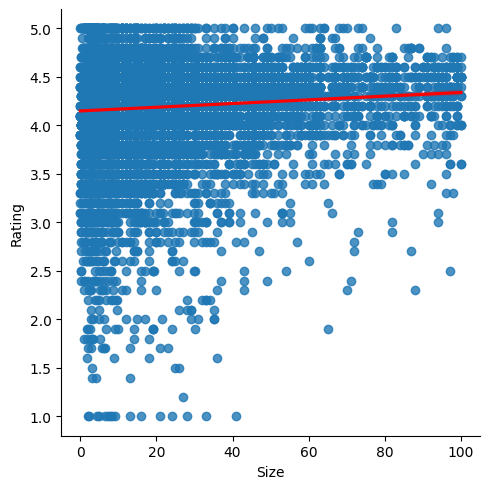

In [511]:
sns.lmplot(df, x='Size', y='Rating', line_kws={'color': 'red'});
print('Pearson Correlation: ', df['Size'].corr(df['Rating']))

################################################################################
# There is not any meaningful relation between these two variables.            #
# the value of pearson correlation say that the positive correlation is too    #
# low to consider it.                                                          #
# as you can see in regression line, it is like a zero correlation line.       #
################################################################################

Type
Free    0.078687
Paid    0.111914
dtype: float64


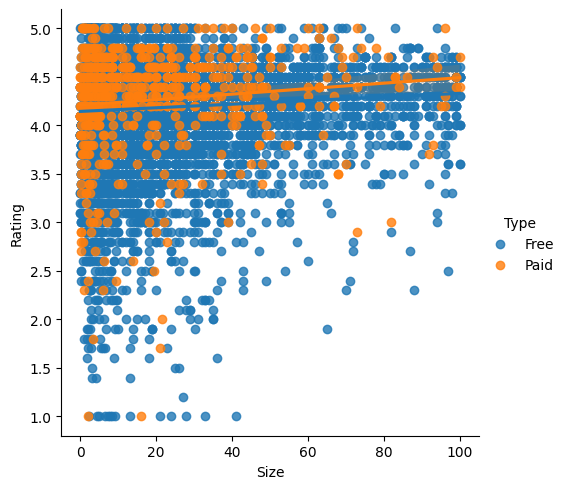

In [512]:
# Question 3:
# Now we can see a stronger positive corrlation in Paid category!
# But, still it is weak.

sns.lmplot(df, x='Size', y='Rating', hue='Type');
correlations = df.groupby('Type').apply(lambda group: group['Rating'].corr(group['Size']))
print(correlations)

In [513]:
################################################################################
# Question 4:                                                                  #
# there is no corr.test() function in python like R language.                  #
# instead, we can use scipy.                                                   #
################################################################################

from scipy.stats import pearsonr

# calculate correlation and p-value
corr_coeff, p_value = pearsonr(df['Size'], df['Rating'])

print("Correlation coefficient:", corr_coeff)
print("P-value:", p_value)

################################################################################
# p-value is extremely close to zero, it shows that H0 (there is no            #
# correlation between these two variable) is rejected. So, there is a weak     #
# positive correlation.                                                        #
################################################################################

Correlation coefficient: 0.08004091653691121
P-value: 8.653663343600285e-15


In [514]:
# Question 5:

conf_level = 0.95
alpha = 1 - conf_level
n = len(df['Rating'])
degrees_of_freedom = n - 2
critical_t_value = t.ppf(1 - alpha / 2, df=degrees_of_freedom)
standard_error = np.sqrt((1 - corr_coeff**2) / (n - 2))

lower_ci = corr_coeff - critical_t_value * (standard_error / np.sqrt(n - 2))
upper_ci = corr_coeff + critical_t_value * (standard_error / np.sqrt(n - 2))

print("Correlation Coefficient:", corr_coeff)
print(f"Confidence Interval: [{lower_ci}, {upper_ci}]")
print("Correlation does not prove causation!")

Correlation Coefficient: 0.08004091653691121
Confidence Interval: [0.07983225270164447, 0.08024958037217796]
Correlation does not prove causation!


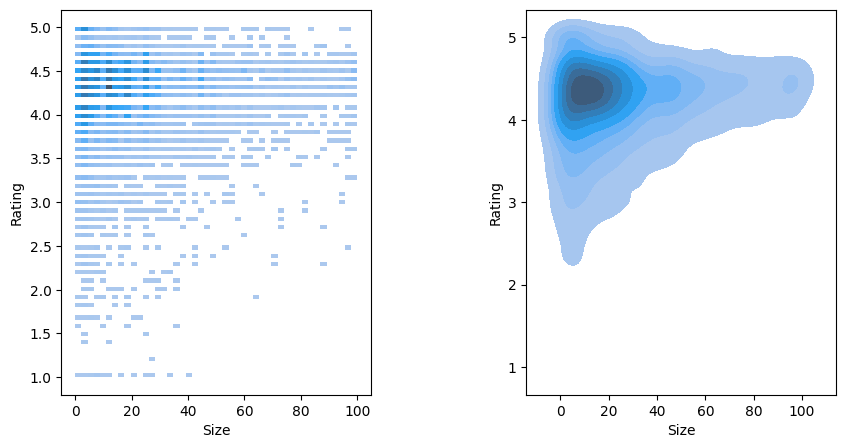

In [515]:
# Question 6:

plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.5)
sns.histplot(x='Size', y='Rating', data=df);
plt.subplot(1, 2, 2)
sns.kdeplot(x='Size', y='Rating', data=df, fill=True);

In [516]:
################################################################################
# Advantages of KDE:                                                           #
# - KDE provides a smooth estimation of the distribution                       #
# - Information of distribuation is not lost by binning                        #
#                                                                              #
# Disadvantages of KDE:                                                        #
# - KDE is more computationally expensive than histogram                       #
# - It can be challenging to detect local patterns because of smoothness       #
#                                                                              #
# Advantages of histogram:                                                     #
# - Histogram is computationally efficient                                     #
# - Histogram can show local patterns in our data                              #
#                                                                              #
# Disadvantage of histogram:                                                   #
# - Bin size can affect the appearance and interpretation of the distribution  #
################################################################################

# Question 3
Consider a group (more than 3) of numeric variables from your dataset.
1. Display all the bivariate relations between the variables using a correlogram1
where each element is a scatter-plot between two variables.
2. Describe the relations between the variables. Are there any interesting
patterns?
3. Create a heatmap correlogram from your variables. Annotate each cell with
their corresponding Pearson’s correlation coefficients. Use red for positive
correlation and blue for negative correlation.
4. These simple correlations show how each two variables are related, but this
leaves open the question as to whether there are any underlying relations
between the entire set. Give an example of how bivariate correlation may fail
to take into account the relations between a group of variables.


In [517]:
# Question 1 and 2:

selected_cols = df[['Rating', 'Size', 'Reviews']]
correlation_matrix = selected_cols.corr()
correlation_matrix

,Rating,Size,Reviews
Rating,1.000000,0.080041,0.068141
Size,0.080041,1.000000,0.115323
Reviews,0.068141,0.115323,1.000000


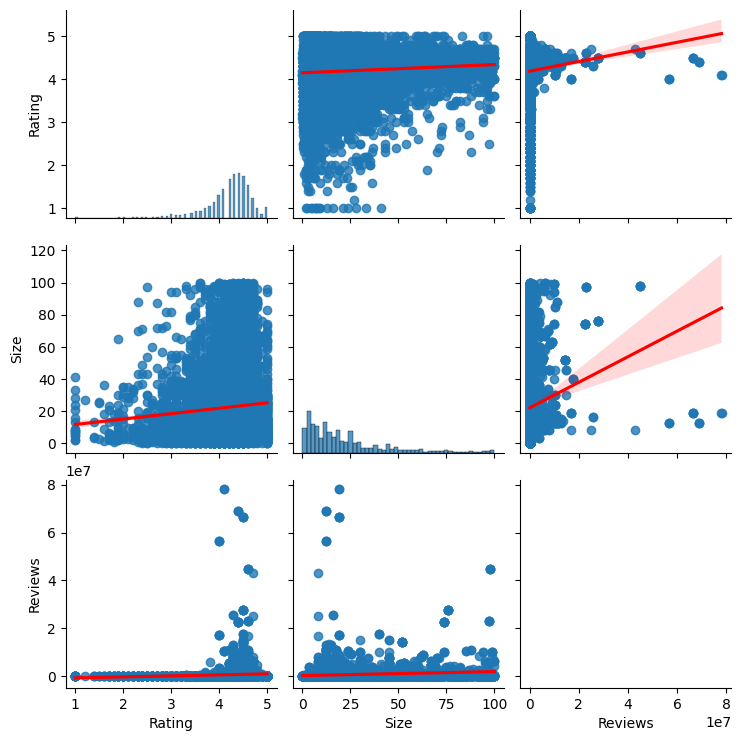

In [542]:
################################################################################
# There is a weak positive correlation between Rating and Reviews.             #
# I guess we can say that those apps that have a high rating, but low number   #
# of reviews are some products that are good but their target                  #
# market is small. some specific people just use them. (niche products)        #
################################################################################

sns.pairplot(selected_cols, kind="reg", plot_kws={'line_kws':{'color':'red'}});

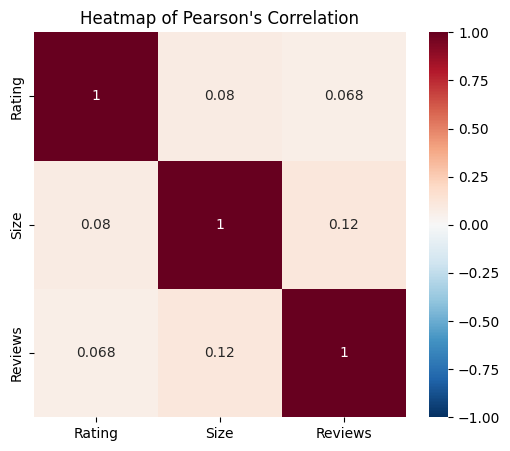

In [518]:
# Question 3:

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu_r", vmin=-1, vmax=1)
plt.title("Heatmap of Pearson's Correlation");

In [519]:
################################################################################
# Question 4:                                                                  #
#                                                                              #
# Bivariate correlation can only find relationships between two variables      #
# at a time. It may fail to find complex relationships between multiple        #
# variables. For example, imagine a scenario where Rating and                  #
# Reviews are both positively correlated another variable, like Size.          #
################################################################################

# Question 4

Choose a categorical variable.
1. Plot the barplot for this variable.
2. Create a frequency table for this variable.
3. Plot a violin plot for this variable.

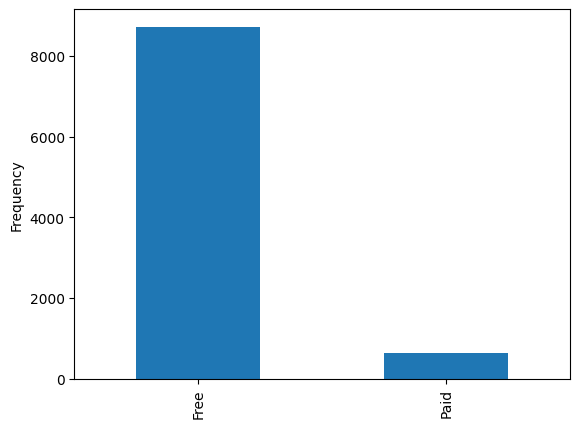

In [520]:
# Question 1:

df['Type'].value_counts().plot(kind='bar');
plt.ylabel('Frequency');

In [521]:
# Question 2:

frequency_table = {}
type_categories = df['Type']

for element in type_categories:
    if element in frequency_table:
        frequency_table[element] += 1
    else:
        frequency_table[element] = 1

fq_table = pd.DataFrame.from_dict(frequency_table, orient='index', columns=['Frequency'])
fq_table

,Frequency
Free,8719
Paid,647


<Axes: xlabel='Size', ylabel='Type'>

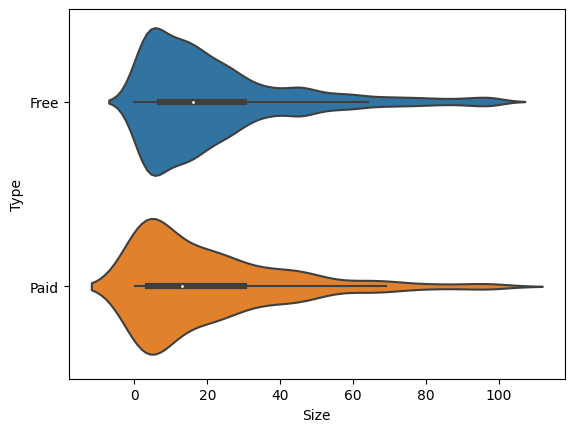

In [522]:
# Question 3:

sns.violinplot(data=df, x='Size', y='Type')

# Question 5
For each of the following chart types, select two categorical variables from your
dataset whose relationship can be best described by that chart and then draw the
chart:
1. Grouped bar chart
2. Contingency table
3. Segmented bar plot
4. Spine plot


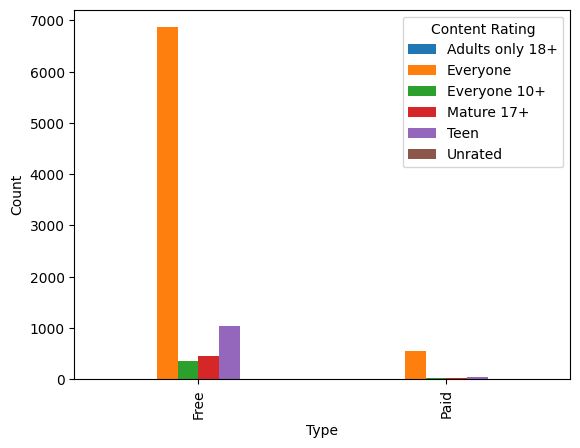

In [523]:
# Question 1:

grouped_data = df.groupby(['Type', 'Content Rating']).size().unstack()

grouped_data.plot(kind='bar', stacked=False)
plt.xlabel('Type')
plt.ylabel('Count');

In [524]:
# Question 2:

contingency_table = pd.crosstab(df['Content Rating'], df['Type'])
contingency_table

Type,Free,Paid
Content Rating,,
Adults only 18+,3,0
Everyone,6868,552
Everyone 10+,364,33
Mature 17+,444,17
Teen,1039,45
Unrated,1,0


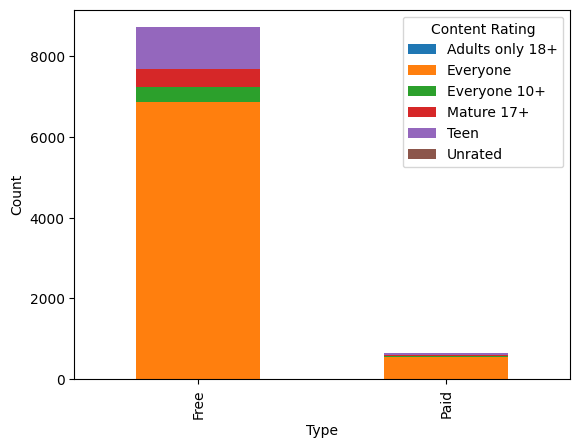

In [525]:
# Question 3:

grouped_data = df.groupby(['Type', 'Content Rating']).size().unstack()

grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Type')
plt.ylabel('Count');

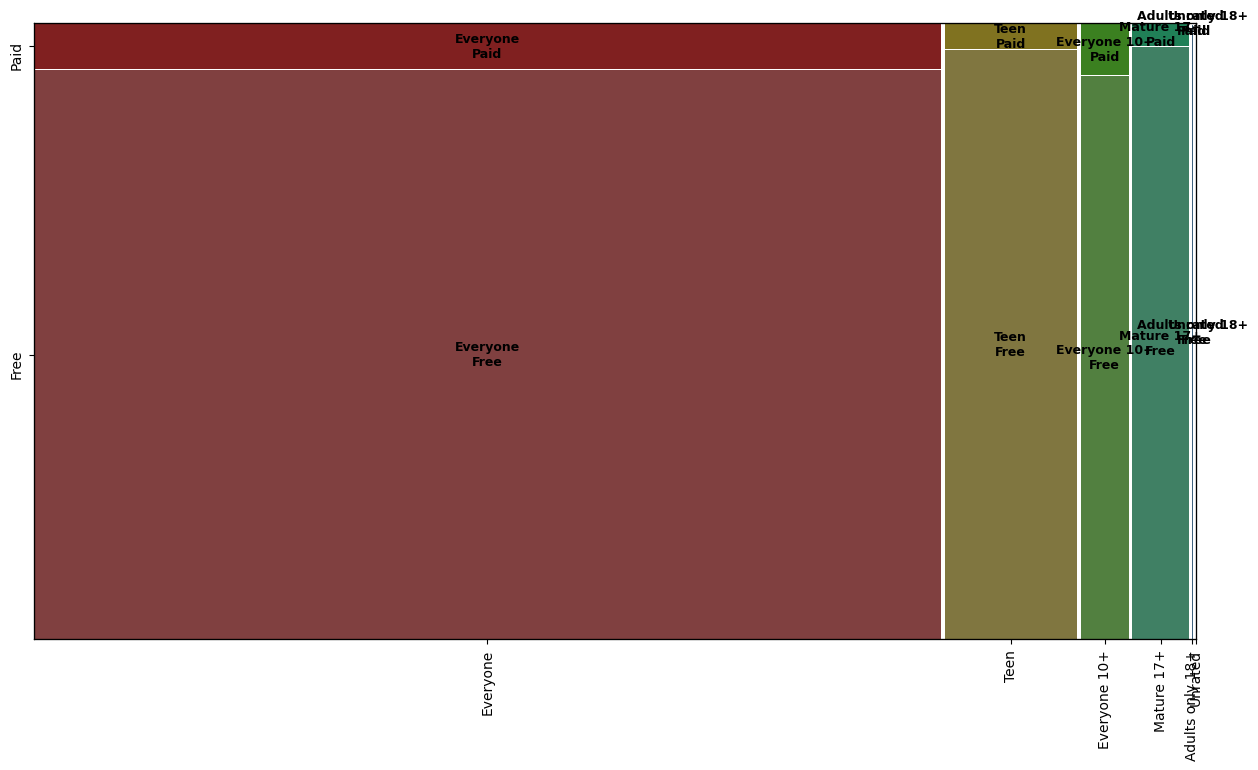

In [547]:
################################################################################
# Question 4:                                                                  #
# As you can see, content rating has many categories, I tried to make it       #
# better look, but this mosaic function is not costumizable enough.            #
################################################################################

from statsmodels.graphics.mosaicplot import mosaic

fig, ax = plt.subplots(figsize=(15, 8))
mosaic(df, ['Content Rating', 'Type'], axes_label=True, gap=0.003, \
       ax=ax, label_rotation=90);

for text in ax.texts:
    text.set_fontsize(9)
    text.set_fontweight('bold')

# Question 6
In certain datasets we would like to compare the distribution of a numerical variable
within different categories of another variable. Visualizing a distribution can be
achieved using various plots such as box-plots, jitter points and violin plots. Select a
sample size of 200 and a categorical and numerical variable from your dataset.
1. Use the mentioned plots to show how the distribution varies within the
different categories of your categorical variable
2. Compare the strengths and weaknesses of these plots.
3. Interpret the data from these plots. What have you learned about the
variables?

In [527]:
df_sample = df.sample(n=200, random_state=1)

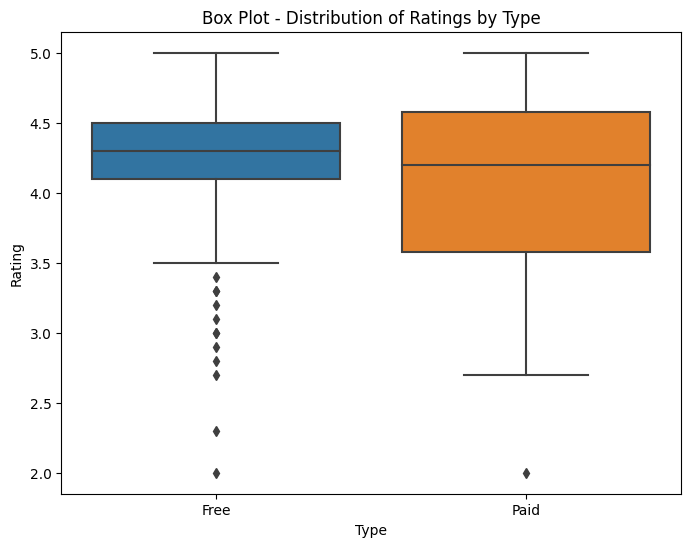

In [528]:
################################################################################
# Box plot:                                                                    #
# Adv:                                                                         #
# - it provides information about the distribution, like mean, quartiles       #
# - we can easily compare the distribution between categories                  #
#                                                                              #
# Disadv:                                                                      #
# - we do not access to shape of the distribution                              #
################################################################################

plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Rating', data=df_sample)
plt.title('Box Plot - Distribution of Ratings by Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

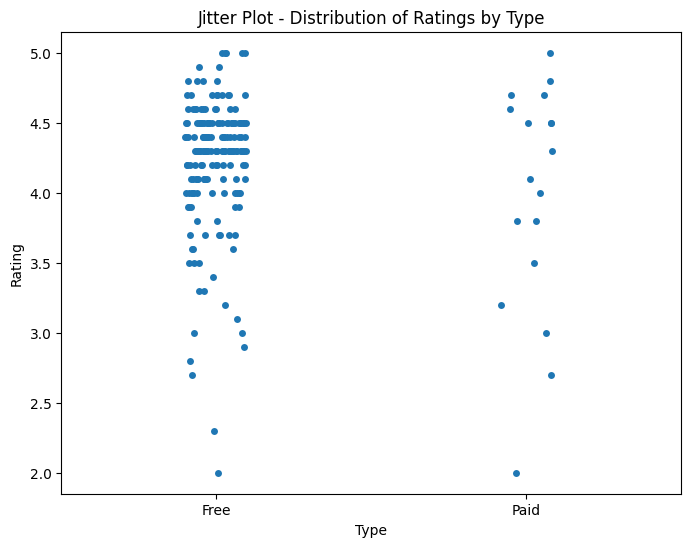

In [529]:
################################################################################
# Jitter plot:                                                                 #
# Adv:                                                                         #
# - we can get a gist about individual data points of our data                 #
#                                                                              #
# Disadv:                                                                      #
# - it dooes not provide a summary/information about the distribution          #
################################################################################

plt.figure(figsize=(8, 6))
sns.stripplot(x='Type', y='Rating', data=df_sample, jitter=True)
plt.title('Jitter Plot - Distribution of Ratings by Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

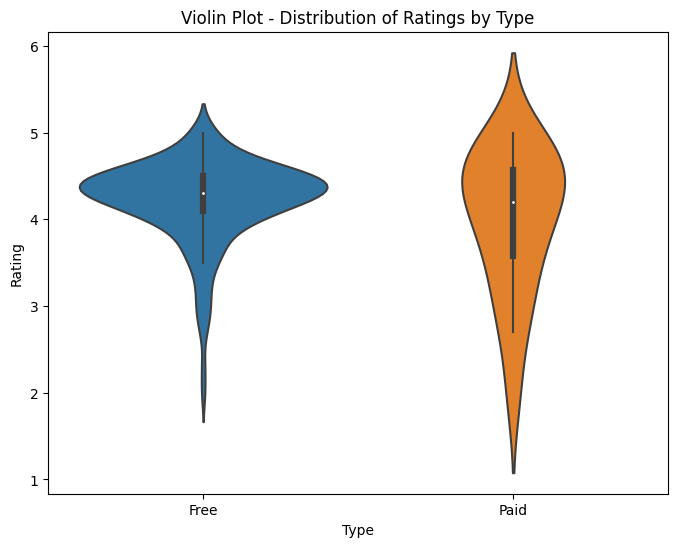

In [530]:
################################################################################
# Violin plot:                                                                 #
# Adv:                                                                         #
# - it combines both box plot and KDE plot which is awesome!                   #
# - it provides information about the distribution, like mean, quartiles       #
# - we can easily compare distributions                                        #
#                                                                              #
# Disadv:                                                                      #
# - at first, it seems complex to understand!                                  #
################################################################################

plt.figure(figsize=(8, 6))
sns.violinplot(x='Type', y='Rating', data=df_sample)
plt.title('Violin Plot - Distribution of Ratings by Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

# Question 7
Choose a numerical variable from your dataset.
1. Calculate a 98% confidence interval for the mean of this variable.
2. Interpret this confidence interval.
3. Design a hypothesis test for the mean of this variable with a power of 50%.
Calculate the number of samples required, take the samples and calculate the
p-value. Confirm or reject your assumption.
4. Calculate the Type I and Type II error.


In [531]:
pop_sample = df['Rating']

################################################################################
# 1. Calculate CI                                                              #
################################################################################

sample_mean = np.mean(pop_sample)
sample_std = np.std(pop_sample)
sample_size = len(pop_sample)
z = 2.326  # z-score

CI = sample_mean + z * (sample_std / np.sqrt(sample_size))
CI = (CI - (2 * z * (sample_std / np.sqrt(sample_size))),
                    CI + (2 * z * (sample_std / np.sqrt(sample_size))))

print("Confidence Interval:", CI)

Confidence Interval: (4.179375123963025, 4.228904309938816)


In [532]:
################################################################################
# 2. Interpret                                                                 #
# It can be concluded that we are 98% confident that the true population mean  #
# of the our variable (rating) is between the calculated confidence interval.  #
################################################################################

In [548]:
###############################################################################
# 3. hypothesis test for the mean of the Rating                                #
# H0: there is not any difference for mean                                     #
# H1: there is difference for mean                                             #
################################################################################

confidence_level = 0.98
alpha = 1 - confidence_level # level of significance, 0.02
power = 0.5
altenative_mean = 3

# measure difference between H0 and the H1
effect_size = np.abs(altenative_mean - sample_mean) / sample_std
required_sample_size = int(np.round(tt_solve_power(effect_size=effect_size, \
                                      alpha=alpha, power=power)))

req_sample = pop_sample.sample(n=required_sample_size, random_state=1)
t_statistic, p_value = stats.ttest_1samp(req_sample, popmean=sample_mean)

print('Required Sample Size:', required_sample_size)
print('P-value:', p_value)

################################################################################
# 4. Type I and Type II errors                                                 #
################################################################################

type_i_error = alpha
type_ii_error = 1 - power
print("Type I Error:", type_i_error)
print("Type II Error:", type_ii_error)

Required Sample Size: 4
P-value: 0.5886942154023447
Type I Error: 0.020000000000000018
Type II Error: 0.5


p-value (0.58) > alpha (0.02) --> H0 is accepted --> there is not any difference for mean.

# Question 8
In this question, you will conduct a hypothesis test for two numerical variables.
Choose a random sample of 25 data points from the dataset and choose two
numerical variables which are of corresponding quantity (e.g sales total for two
different years). We would like to use this data to compare the average quantity
between the two variables.
1. Should we use a one-sided or a two-sided test? Explain your reasoning.
2. Should we use a t-test or a z-test? Explain your reasoning.
3. Calculate a 95% confidence interval for the difference of means
4. Design a hypothesis test to see if these data provide convincing evidence of a
difference between mean values. Does the result agree with 95% the
confidence interval?

In [534]:
selected_columns = df[['Size', 'Category']]

selected_data = {}
for cat in selected_columns['Category'].unique():
    selected_data[cat] = selected_columns[selected_columns['Category'] == cat]

category_dataframe = []
for _, category_df in selected_data.items():
    category_dataframe.append(category_df)

category_dataframe = pd.concat(category_dataframe, ignore_index=True)

In [535]:
category_dataframe.head()

,Size,Category
0,19.0,ART_AND_DESIGN
1,14.0,ART_AND_DESIGN
2,8.7,ART_AND_DESIGN
3,25.0,ART_AND_DESIGN
4,2.8,ART_AND_DESIGN


In [536]:
category_dataframe[category_dataframe['Category'] =='LIFESTYLE'].value_counts().sum() == \
    category_dataframe[category_dataframe['Category'] =='PERSONALIZATION'].value_counts().sum()

True

In [537]:
################################################################################
# Question 1:                                                                  #
# It depend on our research question. One-sided test is appropriate when we    #
# are interested in to find, if one variable is significantly greater or       #
# smaller than the other. Two-sided test is useful when we are interested in,  #
# to find if there is a significant difference between these two variables.    #
# In this question, we need to do a two-sided test based on our test design.   #
################################################################################

In [538]:
################################################################################
# Question 2:                                                                  #
# The choice between t-test and z-test depends on whether we know              #
# standard deviation of the main population or not. In this case, we           #
# do not know it. So, it is more logical to use t-test.                        #
# But, in some cases, when we have enough samples we can use z-test.           #
# Becuase we know that there is millions of apps in google play, our           #
# data may is too small to use z-test.                                         #
################################################################################

In [539]:
# Question 3:

category_1 = "LIFESTYLE"
category_2 = "PERSONALIZATION"
data_category_1 = df[df['Category'] == category_1]['Size']
data_category_2 = df[df['Category'] == category_2]['Size']

mean_cat1 = np.mean(data_category_1)
mean_cat2 = np.mean(data_category_2)
std_dev_cat1 = np.std(data_category_1)
std_dev_cat2 = np.std(data_category_2)
n_cat1 = len(data_category_1)
n_cat2 = len(data_category_2)

# z-score for 95% CI is 1.96
margin_of_error = 1.96 * np.sqrt((std_dev_cat1**2 / n_cat1) \
                                 + (std_dev_cat2**2 / n_cat2))

CI = (mean_cat1 - mean_cat2 - margin_of_error, \
      mean_cat1 - mean_cat2 + margin_of_error)

print("Confidence interval:", CI)

# Note: pay attention that by changing the place of mean_cat1 
# and mean_cat2 in formula, we will get a negative CI.

Confidence interval: (1.4963472859767144, 5.982842167148284)


In [540]:
# H0: mean of two categories are equal, there is no difference
# H1: mean of two categories are not equal, there is a difference

t_test_result = stats.ttest_ind(data_category_1, \
                                data_category_2, equal_var=False)
print('P-value:', t_test_result.pvalue)

P-value: 0.0011668086748135346


**p-value (0.001) < alpha (0.05) --> our H0 is rejected --> mean of two categories are not equal.**

In [541]:
print('Mean of Category 1:', mean_cat1)
print('Mean of Category 2:', mean_cat2)

Mean of Category 1: 15.370838448660715
Mean of Category 2: 11.631243722098215
